In [2]:
import numpy as np  
import pandas as pd  
import tensorflow as tf  
import urllib.request as request  
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('SDS_D.csv' , delimiter = ',')

ytrain = pd.get_dummies(data.disease)
Xtrain = data.drop('disease',axis=1)

In [10]:
# model
#xtrain 14 x 28
#ytrain 14 x 14

# rows 14
# inputs 28
# output 14

In [13]:
def create_train_model(hidden_nodes, num_iters):

    # Reset the graph
    tf.reset_default_graph()

    # Placeholders for input and output data
    X = tf.placeholder(shape=(14, 28), dtype=tf.float64, name='X')
    y = tf.placeholder(shape=(14, 14), dtype=tf.float64, name='y')

    # Variables for two group of weights between the three layers of the network
    W1 = tf.Variable(np.random.rand(28, hidden_nodes), dtype=tf.float64)
    W2 = tf.Variable(np.random.rand(hidden_nodes, 14), dtype=tf.float64)

    # Create the neural net graph
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))

    # Define a loss function
    deltas = tf.square(y_est - y)
    loss = tf.reduce_sum(deltas)

    # Define a train operation to minimize the loss
    optimizer = tf.train.GradientDescentOptimizer(0.005)
    train = optimizer.minimize(loss)

    # Initialize variables and run session
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    # Go through num_iters iterations
    for i in range(num_iters):
        sess.run(train, feed_dict={X: Xtrain, y: ytrain})
        loss_plot[hidden_nodes].append(sess.run(loss, feed_dict={X: Xtrain.as_matrix(), y: ytrain.as_matrix()}))
        weights1 = sess.run(W1)
        weights2 = sess.run(W2)

    print("loss (hidden nodes: %d, iterations: %d): %.2f" % (hidden_nodes, num_iters, loss_plot[hidden_nodes][-1]))
    sess.close()
    return weights1, weights2

/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


loss (hidden nodes: 5, iterations: 2000): 12.97


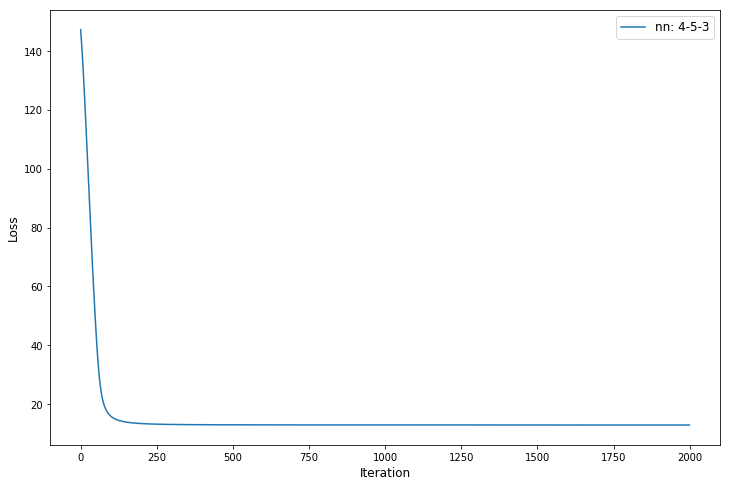

In [17]:
num_hidden_nodes = [5]  
loss_plot = {5: []}  
weights1 = {5: None}  
weights2 = {5: None}  
num_iters = 2000

plt.figure(figsize=(12,8))  
for hidden_nodes in num_hidden_nodes:  
    weights1[hidden_nodes], weights2[hidden_nodes] = create_train_model(hidden_nodes, num_iters)
    plt.plot(range(num_iters), loss_plot[hidden_nodes], label="nn: 4-%d-3" % hidden_nodes)

plt.xlabel('Iteration', fontsize=12)  
plt.ylabel('Loss', fontsize=12)  
plt.legend(fontsize=12) 